### <font color='black'>Vedant Bhalerao

### <font color='black'>D4-63

### <font color='black'>Machine Learning Final Submission

### <font color='black'>Dataset - Breast Cancer Winsonsin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Breast Cancer Wisconsin.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.apply(lambda x: x.nunique())

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [8]:
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df = df.drop(columns=['id','Unnamed: 32'], axis=1)

In [10]:

print(df.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [11]:
df_encoded = pd.get_dummies(df, columns=['area_mean','smoothness_mean'],)

### <font color='black'>Data Visualization

C:\Users\soham\AppData\Local\Temp\ipykernel_27760\1546009078.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


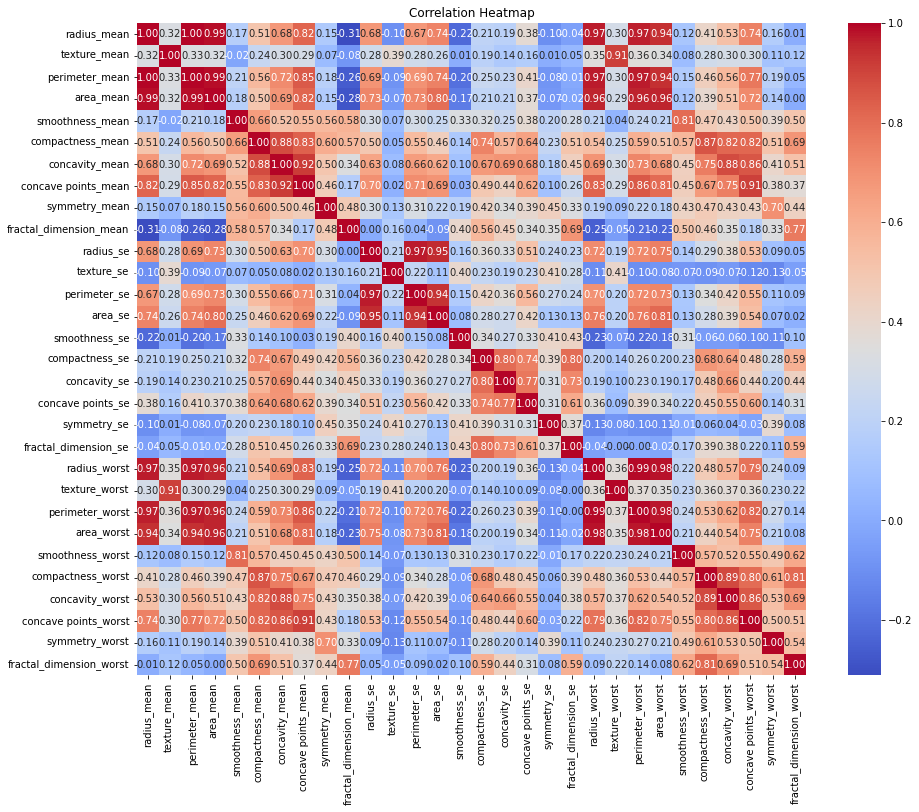

In [12]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

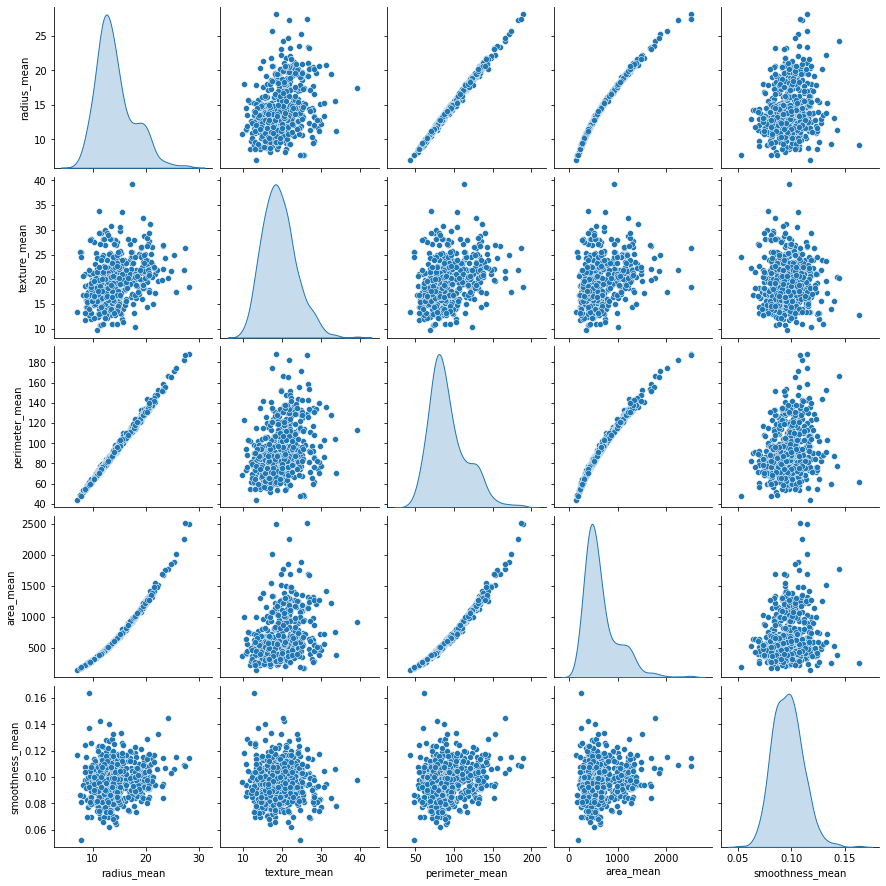

In [13]:
selected_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()

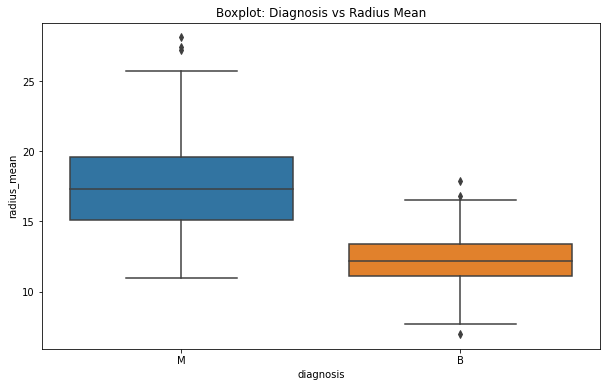

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot: Diagnosis vs Radius Mean')
plt.show()

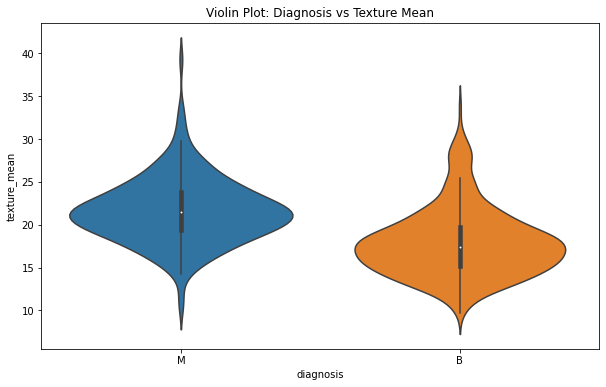

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Violin Plot: Diagnosis vs Texture Mean')
plt.show()

In [16]:
y = df_encoded['diagnosis']

In [17]:
x= df_encoded.drop(columns=['diagnosis'])


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

### <font color='black'>Decision Tree Classifier

In [19]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
dt.score(x_test, y_test)

0.958041958041958

In [21]:
y_pred_dt = dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        91
           M       0.94      0.94      0.94        52

    accuracy                           0.96       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



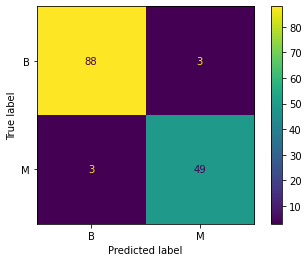

In [22]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(conf_mat_dt, display_labels=dt.classes_).plot()

### <font color='black'>Logistic Regression

In [23]:
lr = LogisticRegression(random_state=1, max_iter=400)
lr.fit(x_train, y_train)

C:\Users\soham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, random_state=1)

In [24]:
lr.score(x_test, y_test)

0.9370629370629371

In [25]:
y_pred_lr = lr.predict(x_test)

In [26]:
print(classification_report(y_test, y_pred_lr ))

              precision    recall  f1-score   support

           B       0.97      0.93      0.95        91
           M       0.89      0.94      0.92        52

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



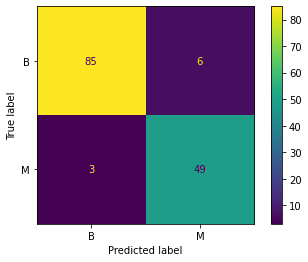

In [27]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(conf_mat_lr, display_labels=lr.classes_).plot()

### <font color='black'>Naive Bayes

In [28]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred_nb = NB.predict(x_test)
NB.score(x_test, y_test)

0.36363636363636365

In [30]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           B       0.50      0.09      0.15        91
           M       0.35      0.85      0.49        52

    accuracy                           0.36       143
   macro avg       0.42      0.47      0.32       143
weighted avg       0.44      0.36      0.27       143



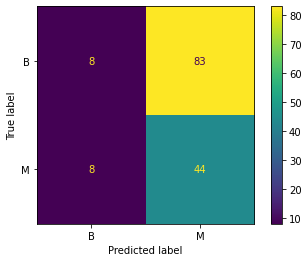

In [31]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(conf_mat_nb, display_labels=NB.classes_).plot()

### <font color='black'>K-Nearest Neighbors

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.score(x_test, y_test)

0.9020979020979021

In [34]:
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           B       0.94      0.90      0.92        91
           M       0.84      0.90      0.87        52

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



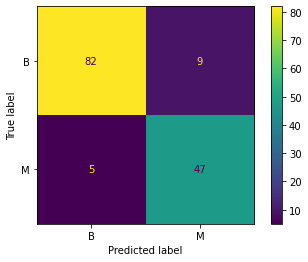

In [35]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_mat_knn, display_labels=knn.classes_).plot()

### <font color='orange'>5. Random Forest Classifier 

In [36]:
error_rate = []
for i in range(1, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    rfc.fit(x_train, y_train)
    error_rate.append(rfc.score(x_test, y_test))

<Axes: >

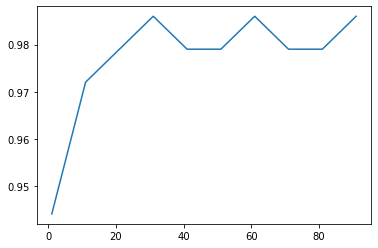

In [37]:
sns.lineplot(x=range(1, 100, 10), y=error_rate)

In [38]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [39]:
rfc.score(x_test, y_test)*100

97.9020979020979

In [40]:
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98        91
           M       1.00      0.94      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



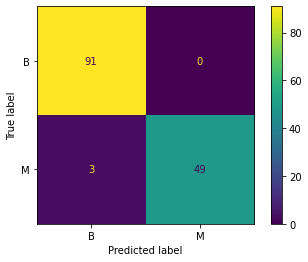

In [41]:
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(conf_mat_rfc, display_labels=['B', 'M']).plot()

### <font color='black'>Support Vector Machine

In [42]:

param_grid = {'C': [0.1, 1, 3, 10, 20],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [43]:
svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [44]:
svc.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
svc.best_params_

{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}

In [46]:
y_pred_svc = svc.predict(x_test)
svc.score(x_test, y_test)

0.9440559440559441

In [47]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        91
           M       0.91      0.94      0.92        52

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



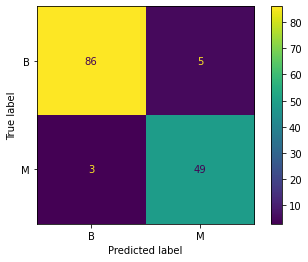

In [48]:
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(conf_mat_svc, display_labels=['B','M']).plot()

### <font color='Black'>K means Clustering</font>

In [49]:
x = df_encoded[['radius_mean', 'texture_mean', 'perimeter_mean']].to_numpy()
wcse = []

In [50]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init='auto')
    kmeans.fit(x)
    wcse.append(kmeans.inertia_)

C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

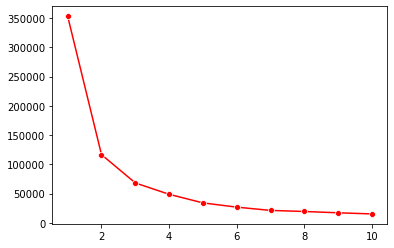

In [51]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [53]:
kmeans.fit(df[['radius_mean', 'texture_mean', 'perimeter_mean']])

C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

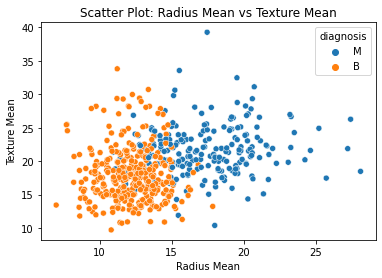

In [54]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title('Scatter Plot: Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()